In [9]:
import numpy as np
import pandas as pd

In [10]:
df_train = pd.read_csv('data/fashion-mnist_train.csv')
df_test = pd.read_csv('data/fashion-mnist_test.csv')

In [11]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [13]:
print(f'Shape.\nRows: {df_train.shape[0]}. Columns: { df_train.shape[1]}')
print('Unique labels:', df_train['label'].nunique())

Shape.
Rows: 60000. Columns: 785
Unique labels: 10


In [14]:
df_train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [15]:
df_test['label'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [17]:
def prepare_data(df, label_col, name):
    print('--------------------')
    print(f'{name} data stats: ')
    print(f'Rows: {df.shape[0]}. Columns: { df.shape[1]}')
    print('Unique labels:', df['label'].nunique())
    y = df[label_col]
    features = list(df.columns)
    features.remove(label_col)
    X = df[features]
    print(f'X_{name}: {X.shape}, y_{name}: {y.shape}')
    print('--------------------')
    return X, y

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
X_train, y_train = prepare_data(df_train, 'label', 'train')
X_test, y_test = prepare_data(df_test, 'label', 'test')

--------------------
train data stats: 
Rows: 60000. Columns: 785
Unique labels: 10
X_train: (60000, 784), y_train: (60000,)
--------------------
--------------------
test data stats: 
Rows: 10000. Columns: 785
Unique labels: 10
X_test: (10000, 784), y_test: (10000,)
--------------------


In [20]:
from sklearn.preprocessing import OneHotEncoder

one_hot_y = OneHotEncoder()
one_hot_y.fit(y_train.to_numpy().reshape(-1, 1))

y_train_transformed = one_hot_y.transform(y_train.to_numpy().reshape(-1, 1)).toarray()
y_test_transformed = one_hot_y.transform(y_test.to_numpy().reshape(-1, 1)).toarray()

In [42]:
one_hot_encoded = one_hot_y.transform(np.array(one_hot_y.categories_).reshape(-1, 1)).toarray()
dict(zip(one_hot_y.categories_[0], one_hot_encoded))

{0: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 4: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 5: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 6: array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 7: array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 8: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 9: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [41]:
categorical_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress",
                       "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boo"]
classes_dict = dict(zip(categorical_classes, one_hot_y.categories_[0]))
classes_dict

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boo': 9}

In [44]:
X_train.max().max()

255

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
print(f"X_train:        max={X_train.max().max()}, min={X_train.min().min()}")
print(f"X_train_scaled: max={X_train_scaled.max().max()}, min={X_train_scaled.min().min()}")
print(f"X_test_scaled:  max={X_test_scaled.max().max()}, min={X_test_scaled.min().min()}")

X_train:        max=255, min=0
X_train_scaled: max=1.0, min=0.0
X_test_scaled:  max=1.308641975308642, min=0.0


In [60]:
param1 = {'activation':'logistic', 
           'solver':'adam', 
           'alpha':0.0001, 
           'max_iter':100, 
           'random_state':42, 
           'early_stopping':True,
         }

In [28]:
def experiment(classifier_params, X_train, y_train, X_test, y_test):
    print('--------------------')
    print(f'Parameters: {classifier_params}')
    classifier = MLPClassifier(**classifier_params)
    classifier.fit(X_train, y_train)
    train_acc = classifier.score(X_train, y_train)
    test_acc = classifier.score(X_test, y_test)
    print(f'Acc train: {train_acc}. Acc test: {test_acc}. Epochs: {classifier.n_iter_}')
    print('--------------------')
    return classifier, test_acc

In [29]:
clf, acc = experiment(param1, X_train_scaled, y_train_transformed, X_test_scaled, y_test_transformed)

--------------------
Parameters: {'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0001, 'max_iter': 500, 'random_state': 42, 'early_stopping': True}
Acc train: 0.8906333333333334. Acc test: 0.8557. Epochs: 58
--------------------


In [58]:
from sklearn.metrics import confusion_matrix
y_true = y_test_transformed
y_predicted =clf.predict(X_test_scaled)

y_true_label = one_hot_y.inverse_transform(y_true)
y_predicted_label = one_hot_y.inverse_transform(y_predicted)



In [78]:
cm = confusion_matrix(y_true_label, y_predicted_label, labels=one_hot_y.categories_[0])

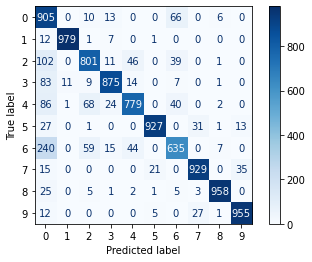

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=one_hot_y.categories_[0])
disp.plot(include_values=True,
          cmap=plt.cm.Blues, ax=None, 
          xticks_rotation='horizontal',
          values_format=None)
plt.show()

In [17]:
# best_classifier = None
# best_score = 0
# for param in param_set:
#     classifier, score = experiment(param, X_train, y_train, X_test, y_test)
#     if score > best_score:
#         best_classifier = classifier
#         best_score = score

NameError: name 'param_set' is not defined

In [63]:
one_hot_y.categories_[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])